In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def times100(start_speed,end_speed,number_frames):
  speeds = np.logspace(start=np.log(start_speed),stop=np.log(end_speed),num=number_frames,base=np.e) # assumes inputs in ms
  std_speeds = np.ceil((speeds-1.0) / 100.0).astype(int) * 100 # round to nearest 100 ms
  return std_speeds

In [ ]:
 num_frames = 240

In [ ]:
shutters = times100(100,180000,num_frames)

In [ ]:
pauses = times100(120000,1000,num_frames-1)
print("Total time paused =", round(np.sum(pauses)/60000,1), "minutes")

Total time paused = 99.8 minutes


In [ ]:
total_hrs = (np.sum(shutters) + np.sum(pauses)) / 1000 / 3600
print("Total capture period =", int(np.floor(total_hrs)), "Hrs, ", int((total_hrs - np.floor(total_hrs) ) * 60),"Mins")
# print("Start sequence", np.round(60 * np.cumsum(shutters)[0] / 1000 / 3600) , "mins before sunset")

Total capture period = 3 Hrs,  17 Mins


In [ ]:
rec_time = np.sum(shutters) / 3600000
print("Total light gathering time =", int(np.floor(rec_time)), "Hrs, ", int((rec_time - np.floor(rec_time) ) * 60),"Mins")

Total light gathering time = 1 Hrs,  37 Mins


In [ ]:
print("Video playback length @ 30p =", round(num_frames/30,1), "seconds")

Video playback length @ 30p = 8.0 seconds


In [ ]:
shutters

array([   100,    200,    200,    200,    200,    200,    200,    200,
          200,    200,    200,    200,    200,    200,    200,    200,
          200,    200,    200,    200,    200,    200,    200,    300,
          300,    300,    300,    300,    300,    300,    300,    300,
          300,    300,    300,    300,    400,    400,    400,    400,
          400,    400,    400,    400,    400,    500,    500,    500,
          500,    500,    500,    500,    600,    600,    600,    600,
          600,    600,    700,    700,    700,    700,    700,    800,
          800,    800,    800,    900,    900,    900,    900,   1000,
         1000,   1000,   1100,   1100,   1100,   1200,   1200,   1200,
         1300,   1300,   1400,   1400,   1400,   1500,   1500,   1600,
         1600,   1700,   1700,   1800,   1800,   1900,   2000,   2000,
         2100,   2100,   2200,   2300,   2400,   2400,   2500,   2600,
         2700,   2700,   2800,   2900,   3000,   3100,   3200,   3300,
      

In [ ]:
pauses

array([120000, 117700, 115300, 113000, 110800, 108600, 106400, 104300,
       102200, 100200,  98200,  96200,  94300,  92400,  90600,  88800,
        87000,  85300,  83600,  81900,  80300,  78700,  77100,  75600,
        74100,  72600,  71200,  69800,  68400,  67000,  65700,  64400,
        63100,  61800,  60600,  59400,  58200,  57100,  55900,  54800,
        53700,  52700,  51600,  50600,  49600,  48600,  47600,  46700,
        45700,  44800,  43900,  43100,  42200,  41400,  40500,  39700,
        39000,  38200,  37400,  36700,  35900,  35200,  34500,  33800,
        33200,  32500,  31900,  31200,  30600,  30000,  29400,  28800,
        28200,  27700,  27100,  26600,  26100,  25500,  25000,  24500,
        24100,  23600,  23100,  22600,  22200,  21800,  21300,  20900,
        20500,  20100,  19700,  19300,  18900,  18500,  18200,  17800,
        17400,  17100,  16800,  16400,  16100,  15800,  15500,  15200,
        14900,  14600,  14300,  14000,  13700,  13400,  13200,  12900,
      

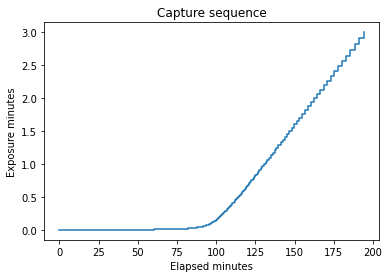

In [ ]:
frames_start_mins = [0] + [(np.cumsum(shutters)[x] + np.cumsum(pauses)[x]) / 60000 for x in range(len(pauses))]

plt.step(frames_start_mins,shutters/60000,where='post')
plt.title("Capture sequence")
plt.xlabel("Elapsed minutes")
plt.ylabel("Exposure minutes");

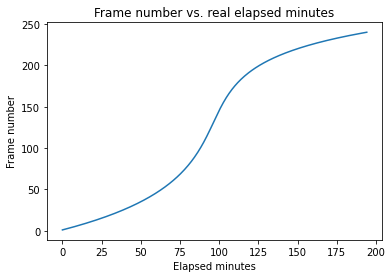

In [ ]:
plt.plot(frames_start_mins, np.arange(1,num_frames+1))
plt.title("Frame number vs. real elapsed minutes")
plt.xlabel("Elapsed minutes")
plt.ylabel("Frame number");

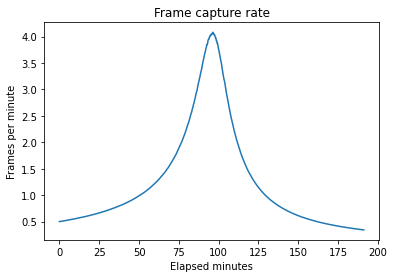

In [ ]:
interval_minutes = np.diff(frames_start_mins)*60

plt.plot(frames_start_mins[:-1],60/interval_minutes)
plt.title("Frame capture rate")
plt.xlabel("Elapsed minutes")
plt.ylabel("Frames per minute");

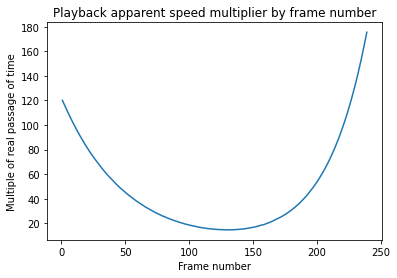

In [ ]:
plt.plot(np.arange(1,num_frames),interval_minutes)
plt.title("Playback apparent speed multiplier by frame number")
plt.xlabel("Frame number")
plt.ylabel("Multiple of real passage of time");

In [ ]:
df = pd.DataFrame(zip(frames_start_mins[:-1],60/interval_minutes),columns=["StartFrameMinute","CaptureRatePerMinute"])

In [ ]:
print("Peak capture rate is",round(df["StartFrameMinute"][df.idxmax(axis=0)["CaptureRatePerMinute"]]),"minutes into recording.")

Peak capture rate is 96 minutes into recording.


In [ ]:
len(pauses)==len(shutters)-1

True